In [1]:
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras

![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*ogbAotjStIKLG4TyLzzDtQ.png)

In [2]:
(x_train, y_train), (x_test,y_test)=keras.datasets.fashion_mnist.load_data()

In [3]:
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [4]:
print(x_test.shape, y_test.shape)

(10000, 28, 28) (10000,)


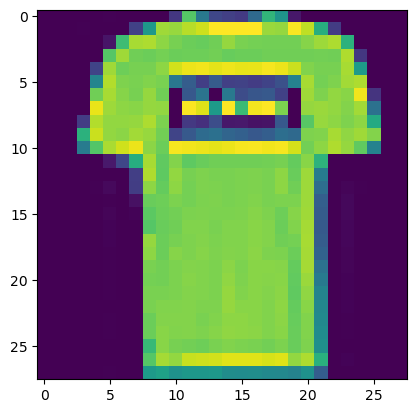

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1])

In [6]:
y_train[1]

0

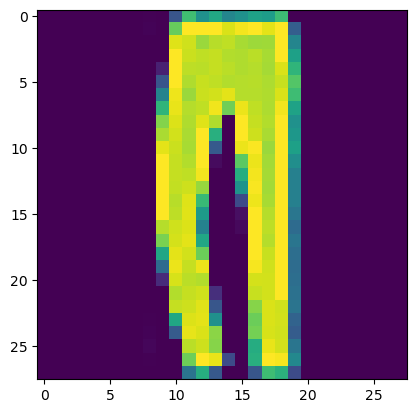

In [7]:
plt.imshow(x_test[2])

In [8]:
y_test[2]

1

Scaling

In [9]:
x_train=x_train/255
x_test=x_test/255

In [10]:
x_train_flattened=x_train.reshape(60000, 28*28)
x_test_flattened=x_test.reshape(10000, 28*28)

In [11]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7441 - loss: 0.7846
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8416 - loss: 0.4671
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8483 - loss: 0.4422
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8539 - loss: 0.4267
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8578 - loss: 0.4160


In [14]:
model.evaluate(x_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8381 - loss: 0.4605


[0.4665643572807312, 0.8360999822616577]

Prediction

In [15]:
y_pred=model.predict(x_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step


In [16]:
y_pred[0]

array([4.1337614e-04, 1.2209926e-04, 9.7762160e-03, 5.6797694e-03,
       6.5582339e-03, 9.9509132e-01, 2.8996568e-02, 9.8955554e-01,
       7.8022772e-01, 9.9695718e-01], dtype=float32)

In [17]:
import numpy as np
np.argmax(y_pred[0])

9

In [18]:
y_test[0]

9

In [19]:
y_predicted=[]
for i in y_pred:
    y_predicted.append(np.argmax(i))
y_predicted[:5]

[9, 2, 1, 1, 6]

In [20]:
y_test[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

In [21]:
cm=tf.math.confusion_matrix(labels=y_test, predictions=y_predicted)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[728,   3,  16,  53,   5,   0, 182,   0,  13,   0],
       [  2, 950,   7,  29,   4,   0,   6,   0,   2,   0],
       [  7,   4, 785,   8,  71,   1, 118,   0,   6,   0],
       [ 12,  10,  20, 858,  26,   0,  70,   0,   4,   0],
       [  0,   0, 178,  32, 615,   0, 168,   0,   7,   0],
       [  0,   0,   0,   1,   0, 943,   0,  35,   2,  19],
       [ 91,   2, 124,  34,  51,   0, 675,   0,  23,   0],
       [  0,   0,   0,   0,   0,  47,   0, 938,   0,  15],
       [  2,   1,   7,  10,   1,   8,  23,   5, 943,   0],
       [  0,   0,   0,   0,   0,  24,   1,  48,   1, 926]])>

Text(95.72222222222221, 0.5, 'Truth')

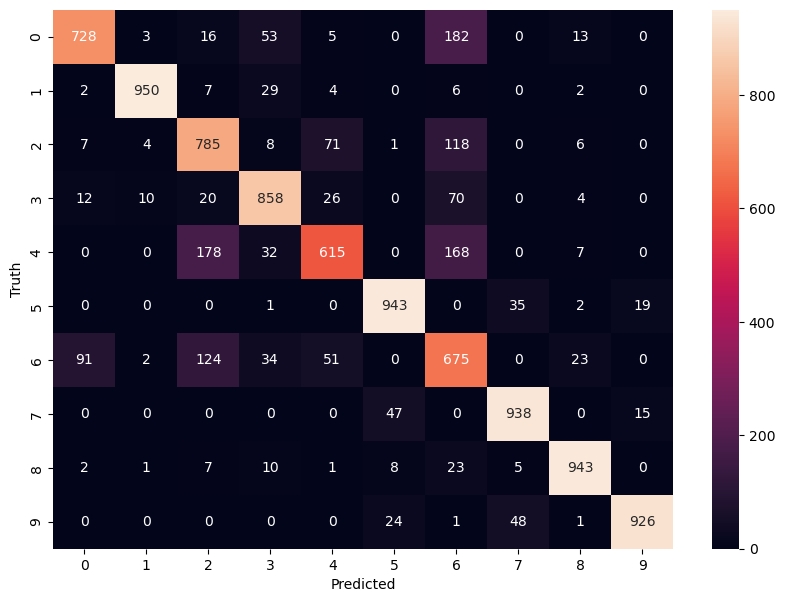

In [22]:
import seaborn as sns 
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

using hidden layer

In [23]:
model2=keras.Sequential([
    keras.layers.Dense(200,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [25]:
model2.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7912 - loss: 0.6103
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8648 - loss: 0.3736
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8770 - loss: 0.3336
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8855 - loss: 0.3086
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8936 - loss: 0.2845


In [26]:
model2.evaluate(x_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8790 - loss: 0.3367


[0.34877800941467285, 0.8751999735832214]

Prediction

In [27]:
y_pred=model2.predict(x_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step


In [28]:
y_pred[0]

array([1.3434005e-03, 7.2591851e-05, 4.3862012e-05, 4.6770265e-06,
       7.2932606e-05, 2.2040574e-01, 9.6000712e-03, 9.1785431e-01,
       8.8304104e-03, 9.8813522e-01], dtype=float32)

In [29]:
np.argmax(y_pred[0])

9

In [30]:
y_test[0]

9

In [31]:
y_predicted=[]
for i in y_pred:
    y_predicted.append(np.argmax(i))
y_predicted[:5]

[9, 2, 1, 1, 6]

In [32]:
y_test[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

In [45]:
cm1=tf.math.confusion_matrix(labels=y_test, predictions=y_predicted)
cm1

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[839,   3,  23,  13,   3,   2, 106,   0,  11,   0],
       [  3, 974,   1,  15,   4,   0,   2,   0,   1,   0],
       [ 13,   0, 797,  10,  83,   0,  96,   0,   1,   0],
       [ 27,   9,  10, 871,  35,   0,  38,   0,  10,   0],
       [  1,   0, 124,  24, 764,   0,  84,   0,   3,   0],
       [  0,   0,   0,   1,   0, 947,   0,  32,   1,  19],
       [136,   0,  84,  21,  47,   0, 695,   0,  17,   0],
       [  0,   0,   0,   0,   0,  12,   0, 976,   1,  11],
       [  4,   0,   3,   3,   3,   1,   2,   4, 980,   0],
       [  0,   0,   0,   0,   0,   5,   1,  60,   0, 934]])>

Text(95.72222222222221, 0.5, 'Truth')

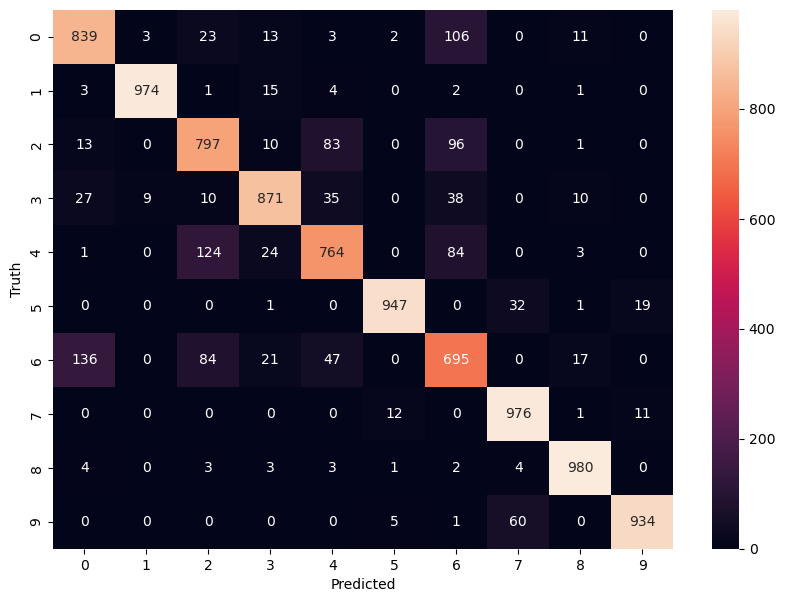

In [46]:
import seaborn as sns 
plt.figure(figsize=(10,7))
sns.heatmap(cm1, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

Using another hidden layer

In [47]:
model3=keras.Sequential([
    keras.layers.Dense(200,input_shape=(784,),activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
model3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [49]:
model3.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7877 - loss: 0.6103
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8635 - loss: 0.3741
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8785 - loss: 0.3293
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8881 - loss: 0.3066
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8925 - loss: 0.2872


In [50]:
model3.evaluate(x_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8774 - loss: 0.3439


[0.3460237979888916, 0.8761000037193298]

Prediction

In [51]:
y_pred=model3.predict(x_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step


In [52]:
y_pred[0]

array([3.8788083e-04, 3.7774205e-06, 1.1031894e-05, 9.2118859e-07,
       3.3329788e-04, 1.2926790e-01, 1.2812112e-03, 8.5114294e-01,
       1.0542430e-03, 9.6648782e-01], dtype=float32)

In [53]:
np.argmax(y_pred[0])

9

In [54]:
y_test[0]

9

In [55]:
y_predicted=[]
for i in y_pred:
    y_predicted.append(np.argmax(i))
y_predicted[:5]

[9, 2, 1, 1, 6]

In [56]:
y_test[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

In [57]:
cm2=tf.math.confusion_matrix(labels=y_test, predictions=y_predicted)
cm2

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[815,   4,  25,  21,   8,   0, 108,   0,  19,   0],
       [  2, 974,   0,  18,   3,   0,   1,   0,   2,   0],
       [ 12,   0, 785,   9, 130,   0,  59,   0,   5,   0],
       [ 18,   9,  17, 889,  39,   0,  21,   0,   7,   0],
       [  0,   1,  84,  22, 849,   0,  38,   0,   6,   0],
       [  0,   0,   0,   1,   0, 969,   0,  22,   1,   7],
       [106,   7, 107,  32,  86,   0, 635,   0,  27,   0],
       [  0,   0,   0,   0,   0,  18,   0, 972,   2,   8],
       [  3,   0,   0,   4,   5,   2,   1,   2, 983,   0],
       [  0,   0,   0,   1,   0,  15,   1,  93,   0, 890]])>

Text(95.72222222222221, 0.5, 'Truth')

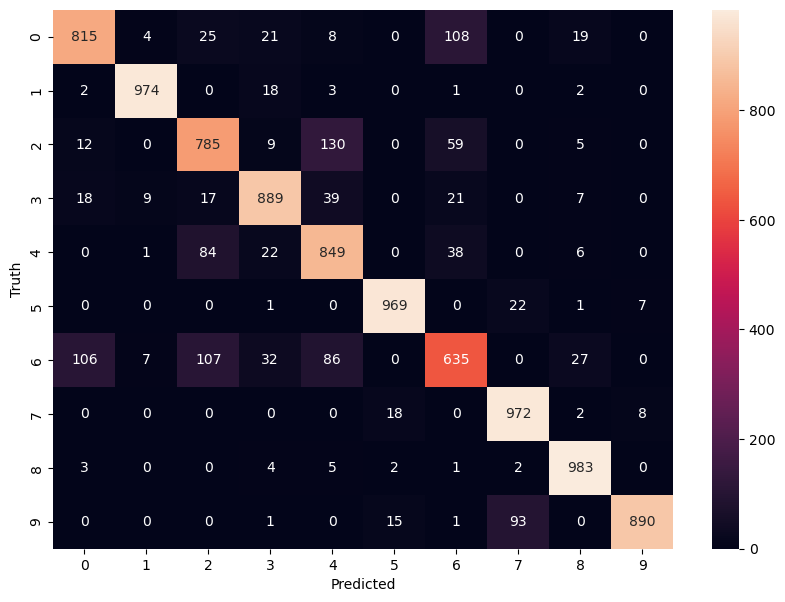

In [60]:
plt.figure(figsize=(10,7))
sns.heatmap(cm2, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")